# Big Data

## Trabajo Práctico 4

## Juan Diego Barnes, Francisco Legaspe, Rodrigo Martin

In [1]:
!pip install statsmodels
!pip install seaborn
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib

import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  # Para matriz de correlaciones
import statsmodels.api as sm   
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, average_precision_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from scipy.special import expit



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
#Defino el repositorio 
os.chdir('C:/Users/Usuario/Desktop/MAESTRIA/Big Data/TPs/BigData/TP4')

## Parte 1 

#### Ejercicio 1 y 2

Primero cargamos los datos de la encuenta de hogar y consevamos solo las observaciones que corresponden a los aglomerados 32 y 33

In [94]:
# PLantamos una semilla para que los resultados sean siempre los mismos
np.random.seed(913)

In [95]:
# Cargamos los datos, menteniendo solo las observaciones para el Gran Buenos Aires y la Ciudad de Buenos Aires:
hogares = pd.read_excel("usu_hogar_T123.xlsx")
hogares = hogares[(hogares['AGLOMERADO']==32) | (hogares['AGLOMERADO']==33)]
individual = pd.read_excel("usu_individual_T123.xlsx")
individual = individual[(individual['AGLOMERADO']==32) | (individual['AGLOMERADO']==33)]

In [96]:
# Chequeamos que columnas estan duplicadas para que no se nos duplique en el merge
columnas_duplicadas = set(hogares.columns).intersection(set(individual.columns))
# Removemos CODUSU y NRO_HOGAR de la lista, para mantenerlas como ids del merge
columnas_duplicadas.remove("CODUSU")
columnas_duplicadas.remove("NRO_HOGAR")
# Eliminamos los duplicados de la base hogar
hogares.drop(columnas_duplicadas, axis=1, inplace=True)

# Hacemos el left join de los hogares con los individuos
df = pd.merge(individual,hogares, on=["CODUSU", "NRO_HOGAR"], how="left")

#### Ejercicio 3

Para la limpieza utilizaremos las herramientas que nos ofrece el modulo `pandas`, para el manejo de DataFrames. A continuación, explicaré las funciones que se están utilizando:

   - la función `describe()` proporciona información resumida sobre la distribución de valores en esa columna. Incluyendo la media, minimo, desviación estánda, cuartiles, etc.

   - `isnull()` es un método de los DataFrames de pandas que devuelve una matriz booleana indicando las ubicaciones de los valores faltantes en el DataFrame.

   - `dropna()` es un método de los DataFrames de pandas que elimina las filas o columnas con valores faltantes.

   - La función `fillna()` se utiliza para rellenar los valores faltantes en la columna.

   - La función `drop()` con `axis=1`, elimina una columna inidicada.

   -  La función `duplicated()` es un método de pandas que devuelve una Serie de valores booleanos que indica si cada fila del DataFrame es una duplicada de una fila anterior. Con `sum()` contamos estos booleanos generado de modo de obtener la cantidad de duplicados.


Primero, generamos un tabla de estadisticas descriptivas de las variables de interes:

In [97]:
# Hacemos un cheaqueo rapido de los datos, generando una tabla de estadisticas descriptivas
descripcion = df.describe()
descripcion 

,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
count,7619.0,7619.0,7619.000000,7619.000000,7619.000000,7619.0,7619.000000,7619.000000,7619.000000,7619.000000,...,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000,7619.000000
mean,2023.0,1.0,1.037669,2.377609,0.878593,1.0,32.771230,2074.901037,2.375246,1.519359,...,2.010106,3.696417,0.601391,3.095026,3.181914,0.718204,63.167870,0.725948,0.239533,0.008006
std,0.0,0.0,1.002110,1.515935,0.336128,0.0,0.420069,1105.848033,1.567262,0.499658,...,0.265803,1.852985,0.947037,1.441937,12.749674,2.234893,45.991516,5.074449,2.607869,0.211420
min,2023.0,1.0,1.000000,1.000000,0.000000,1.0,32.000000,45.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2023.0,1.0,1.000000,1.000000,1.000000,1.0,33.000000,1313.000000,1.000000,1.000000,...,2.000000,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,2023.0,1.0,1.000000,2.000000,1.000000,1.0,33.000000,1978.000000,2.000000,2.000000,...,2.000000,4.000000,0.000000,3.000000,1.000000,0.000000,98.000000,0.000000,0.000000,0.000000
75%,2023.0,1.0,1.000000,3.000000,1.000000,1.0,33.000000,2657.000000,3.000000,2.000000,...,2.000000,5.000000,1.000000,4.000000,2.000000,2.000000,98.000000,0.000000,0.000000,0.000000
max,2023.0,1.0,51.000000,13.000000,2.000000,1.0,33.000000,8423.000000,10.000000,2.000000,...,9.000000,13.000000,8.000000,10.000000,99.000000,97.000000,98.000000,98.000000,98.000000,6.000000


Ahora comenzaremos con la limpieza de los datos. Primero, eliminaremos las filas que tengan valores faltantes en las variables de interes.

In [98]:
# Eliminimamos la varaible si esta tiene mas de 90% de percent_missing
df = df.dropna(thresh=len(df)*0.9, axis=1)
# Chequeamos nuevamente los missing
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_eph = pd.DataFrame({'Columna': df.columns,
                                 'Porcentaje de NAs': percent_missing})
# Remplazamos los missings en CH08 (cobertura medica) por 9 = Ns/Nc
df['CH08'] = df['CH08'].fillna(9)
# Reempalazamos el 9 por 0
df['CH08'] = df['CH08'].replace(9,0)

# Consideramos que el que sea missing brinda informacion relevante, por lo que lo dejamos como una categoria mas

# De este modo no tenemos mas NAs

In [99]:
# Cheaqueamos que no existan ingresos negativos
df['ITF'].describe()

count    7.619000e+03
mean     1.384079e+05
std      3.349417e+05
min      0.000000e+00
25%      0.000000e+00
50%      7.500000e+04
75%      2.000000e+05
max      1.099000e+07
Name: ITF, dtype: float64

In [100]:
#Hacemos un ultimo check de missings
percent_missing1 = df.isnull().sum() * 100 / len(df)
missing_value_eph1 = pd.DataFrame({'Columna': df.columns,
                                 'Porcentaje de NAs': percent_missing})
missing_value_eph1

,Columna,Porcentaje de NAs
CODUSU,CODUSU,0.0
ANO4,ANO4,0.0
TRIMESTRE,TRIMESTRE,0.0
NRO_HOGAR,NRO_HOGAR,0.0
COMPONENTE,COMPONENTE,0.0
...,...,...
VII1_2,VII1_2,0.0
VII2_1,VII2_1,0.0
VII2_2,VII2_2,0.0
VII2_3,VII2_3,0.0


Ahora, noramlizamos algunos valores que son NaNs a NA o a 0 segun que nos parezca mas adecuado.

In [101]:
# eliminamos observaciones con datos NS/NC en la variable para cantidad de habitaciones 
df = df[(df['IV2'] < 99)]

# Remplazamos las que son NS/NR por 0
df['CH11'] = df['CH11'].replace(9,0)
df['CH13'] = df['CH13'].replace(3,0)
df['CH15'] = df['CH15'].replace(9,0)
df['CH16'] = df['CH16'].replace(9,0)
df['NIVEL_ED'] = df['NIVEL_ED'].replace(9,0)
df['CAT_OCUP'] = df['CAT_OCUP'].replace(9,0)
# Al hacer esto mo perdemos la observacion.


Una vez que realizamos la limpieza de datos, tenemos que decidir que variables categóricas y string vamos a usar y transformalas. Las variables que seleccionamos a continuación, son las que pensamos que son importantes para el análisis de la pobreza. 

Estas variables son: el material de los pisos, de donde consigue agua el hogar, la fuente de agua, si el hogar tiene bañor, donde esta el baño, si la vivienda esta ubicada en la proximidad de un basural, si la vivienda está ubicada en un villa de emergencia, el tipo de vivienda,  el régimen de tenencia, el combustible utilizado para cocinar, el origen de los ingresos de los habitantes de la vivienda (salarios por trabajo, jubilaciones o pensiones, o subsidios o ayuda social), el decil de ingreso en el que se encuentra el hogar, si el individuo sabe leer y escribir, si asiste a un establecimiento educativo, qué tipo de establecimiento es, y, por último, cuál es el nivel educativo que cursa o el más alto que alcanzó.


In [102]:
# Categorica: IV1, IV3, IV6, IV7, IV8, IV9, IV12_1, IV12_3, II7, II8, V1, V2, V5, DECCFR, CH09, CH10, CH11, CH12

In [103]:
# Ahora vamos a crear las variables dummy para las categoricas
for col in ['IV1', 'IV3', 'IV6', 'IV7', 'IV8', 'IV9', 'IV12_1', 'IV12_3', 'II7', 'II8', 'V1', 'V2', 'V5', 'DECCFR', 'CH09', 'CH10', 'CH11', 'CH12']:
    df[col] = df[col].astype('category')

In [104]:
df

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,2,2,0,2,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,2,3,1,2,2,1,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,2,1,0,1,1,0,96,0,0,0
7615,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0
7616,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0
7617,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,2,3,0,3,1,2,3,0,0,0


## Ejercicio 4

Construimos  variables que no estén en la base y que sean relevantes para predecir individuos bajo la línea de pobreza. Primero construimos una variable que  muestra la proporción de menores de 10 años que hay en el hogar. Pensamos que es importante esta variable porque la pobreza infantil es un factor importante en nuestro país. Por otro lado, construimos una variable que describe el número de inactivos por hogar. Es decir, si son de baja calidad (casa_mala) el indicador tomara el valor de 1.

En addición, generamos una tercera variable que nos muestra el nivel de eduación máximo alcanzado por el hogar.

A continuación exponemos las variables comentadas empezando por la que indica la proporción de menores de 10 años en el hogar: 

In [105]:
# Primero creamos la variable proporcion de menores de 10 en el hogar
df['Prop_Men10'] = df.apply(lambda row: row.IX_MEN10 / row.IX_TOT, axis=1)

In [106]:

def g(x):
    '''
    esta funcion crea una condicion que devuelve un 1 si hay mas miembros totales del hogar que ambientes
    '''
    
    if x['IX_TOT'] > x['II1']:
        return 1
    else:
        return 0

df['potencial_hacinamiento'] = df.apply(g, axis=1).astype('category')   
    

In [107]:
# Copiamos la data original para evitar modificarla
df_ind2 = individual.copy()

# Copia la variable de educación
df_ind2['NIVEL_ED_aux'] = df_ind2['NIVEL_ED'].copy()
# Reemplazamos al valor de Sin Instruccion, NS-Nr y 99
df_ind2['NIVEL_ED_aux'] = df_ind2['NIVEL_ED_aux'].replace( 7, 0 )
df_ind2['NIVEL_ED_aux'] = df_ind2['NIVEL_ED_aux'].replace(9, -1)
df_ind2['NIVEL_ED_aux'] = df_ind2['NIVEL_ED_aux'].replace(99, -1)
df_max_edu = df_ind2.groupby( ['CODUSU', 'NRO_HOGAR'], as_index = False )['NIVEL_ED_aux'].max() \
                .rename( columns = { 'NIVEL_ED_aux' : 'max_edu_hogar'} )

# Maximo nivel de educación en el hogar
dummies_max_edu = pd.get_dummies( df_max_edu['max_edu_hogar'] )
new_cols = []
for col in dummies_max_edu.columns:
    new_cols.append( 'max_edu_hogar_' + f"{col}")
# Dando nuevos nombres a las columnas
dummies_max_edu.columns = new_cols

# df max edu hogar hot encoding
df_max_edu = pd.concat( [df_max_edu, dummies_max_edu], axis = 1 ).drop('max_edu_hogar', axis = 1 )

# Añadimo el máximo nivel educativo a nivel de hogar
df_clean4 = df.merge( df_max_edu, on = ['CODUSU', 'NRO_HOGAR'], how = 'left',  ).copy()

### Ejercicio 5 

A continuación presentamos un gráfico para describir la interacción o correlación entre las variables.

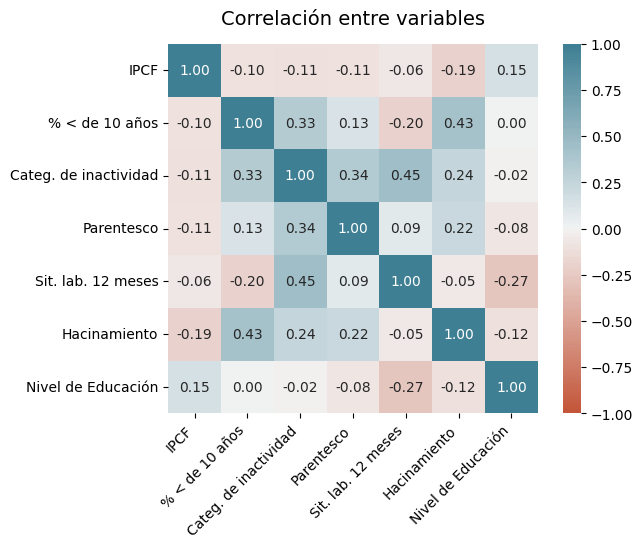

In [108]:
# Creamos una base auxiliar para calcular la correlacion entre distintas variables
base_corr = df[['IPCF', 'Prop_Men10', 'CAT_INAC', 'CH03', 'PP02I','potencial_hacinamiento', 'NIVEL_ED']]

plt.title('Correlación entre variables', y=1.03, size=14)

# Definimos las labels para el heatmap. 

x_axis_labels = ['IPCF', '% < de 10 años', 'Categ. de inactividad', 'Parentesco', 'Sit. lab. 12 meses', 'Hacinamiento', 'Nivel de Educación']

ax = sns.heatmap(
    base_corr.astype(float).corr(), 
    vmin=-1, vmax=1, center=0, fmt='.2f',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    xticklabels=x_axis_labels,
    yticklabels=x_axis_labels
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Podemos descatar alguna de las relaciones observadas en el grafico, como por ejemplo, la correlacion positiva y alta entre el procentaje de menores de 10 años y el nivel de hacinamiento. Otra correlacion positiva es la que se observa entre el nivel de educación y el nivel de ingreso. Por otro lado, se observa una correlacion negativa entre el nivel de educación y el hacinamiento.

### Ejercicio 6

Construimos la columna adulto equiv y la columna ad equiv hogar. Dividimos la base en dos dataframes donde: uno conserva las personas que reportaron ITF (dataframe llamado respondieron) y otro a las personas que no reportaron ITF (llamado norespondieron). Además, agregamos a la base respondieron una columna llamada ingreso necesario que sea el producto de la canasta básica por ad equiv hogar. A la base respondieron agregamos una columna llamada pobre, que toma valor 1 si el ITF es menor al ingreso necesario que necesita esa familia y 0 en caso contrario.


In [109]:
# Cargaos la tabla de equivalencia de adultos
adulto_equiv_data = pd.read_excel("tabla_adulto_equiv.xlsx")

# melt adulto_equiv_data Muejeres y Hombres
adulto_equiv_data = pd.melt(adulto_equiv_data, id_vars=['Edad'], value_name= 'adulto_equiv')


In [110]:

# Change values of variable column to 1 if Hom and 2 if Muj
adulto_equiv_data['variable'] = np.where(adulto_equiv_data['variable']=='Mujeres', 2, 1)
# Rename variable column to Sexo
adulto_equiv_data = adulto_equiv_data.rename(columns={'variable': 'Sexo'})

#Función que lee los valores de edad en números CH06 y me lo impacta en la categoría etarea correspondiende de la nueva tabla.
def rango_edad(edad):
    if edad < 0:
        rangoetareo = "Menor de 1 años"
    elif edad > 0 and edad < 18:
        rangoetareo = str(edad)+" años"
    elif 17 < edad and edad < 30:
        rangoetareo = "18 a 29 años"
    elif 29 < edad and edad < 46:
        rangoetareo = "30 a 45 años"
    elif 45 < edad and edad < 61:
        rangoetareo = "46 a 60 años"
    elif 60 < edad and edad < 76:
        rangoetareo = "61 a 75 años"
    elif edad > 75:
        rangoetareo = "más de 75 años"
        
    else:
        rangoetareo = 'NaN'
    return rangoetareo

#Aplico la función a mi tabla para crear la columna deseada
df['rango_etareo'] = df['CH06'].apply(rango_edad)


#Renombro la columna "edad", igual que la de la otra tabla
df = df.rename(columns={'rango_etareo': 'Edad'})
df = df.rename(columns={'CH04': 'Sexo'})

# Mejoramos la funcion de match en relacion al TP2 donde los match para los menores de 1 año no estaban bien definidos.



In [111]:
df

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,Prop_Men10,potencial_hacinamiento,Edad
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,2,1,0,2,0,0,0,0.000000,0,61 a 75 años
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,2,1,0,2,0,0,0,0.000000,0,61 a 75 años
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,2,2,1,98,0,0,0,0.333333,0,30 a 45 años
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,2,2,1,98,0,0,0,0.333333,0,18 a 29 años
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,2,2,1,98,0,0,0,0.333333,0,9 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,1,1,0,96,0,0,0,0.000000,0,más de 75 años
7615,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,3,1,2,3,0,0,0,0.000000,0,30 a 45 años
7616,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,3,1,2,3,0,0,0,0.000000,0,17 años
7617,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,3,1,2,3,0,0,0,0.000000,0,18 a 29 años


In [112]:

# Hacemos el merge de las dos tablas
df = df.merge(adulto_equiv_data, on=['Sexo','Edad'], how='left')
#Sumo para las personas de un mismo hogary loguardo como ad_equiv_hogar
df['ad_equiv_hogar'] = df.groupby('CODUSU')['adulto_equiv'].transform('sum')



In [113]:
# Punto 1.3: Particionamos la muestra segun respondieron o no sobre los ingresos:
respondieron = df[df['ITF'] > 0]
respondieron = respondieron.reset_index(drop=True)
norespondieron = df[df['ITF'] <= 0]
norespondieron = norespondieron.reset_index(drop=True)

In [114]:

# Punto 1.4: Agregar columna que indica el ingreso necesario del hogar para no ser pobre
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * 53371.05


In [115]:

# Punto 1.4: Columna que indica si una persona es pobre según el ingreso de su hogar
respondieron.loc[:, 'pobre'] = (respondieron['ingreso_necesario'] > respondieron['ITF']).astype(int)
mean_pobres = respondieron['pobre'].mean()
print(mean_pobres)


0.34947768281101615


In [116]:
# Calaculamos la tasa de pobreza de hogares, expondiendo la muestra con el ponderador de hogares, PONDIH.
# Columna indicadora de pobreza de hogares (Como tps anteriores)
respondieron.loc[:, 'pobre_hogar'] = (respondieron['ingreso_necesario'] > respondieron['ITF']).astype(int)

# Tasa de pobreza de hogares (sin expandir)
mean_pobres_hogar_temp = respondieron['pobre_hogar'].mean()
print(mean_pobres_hogar_temp)


0.34947768281101615


#### Ejercicio 7

In [117]:
# Ponderar los hogares pobres ()
respondieron['pobre_hogar_ponde'] = respondieron['PONDIH'] * respondieron['pobre_hogar']
# Esto es lo que haciamos mal antes, ahora lo intentearemos corregir para que efectivamente estemos contando a cada hogar solo una vez
respondieron_hogares = respondieron.groupby(['CODUSU', 'NRO_HOGAR']).agg({'pobre': 'mean', 'PONDIH': 'mean'})
temp = respondieron_hogares.groupby('pobre').PONDIH.sum().to_frame()
mean_pobres_hogar = temp.apply(lambda x: 
                                        100*x/float(x.sum()))

print(mean_pobres_hogar)


          PONDIH
pobre           
0.0    73.641837
1.0    26.358163


Por otro lado, el porcentaje que reporta el INDEC es de 40.1%, más alto que nuestra predicción de la tasa de pobreza.

### Parte II: Construcción de funciones

In [118]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.model_selection import ParameterGrid

In [119]:
def evalua_metodo(method, x_train, y_train, x_test, y_test):
    '''
    Esta función recibe como inputs un método ya definido y un dataset ya dividido entre X e Y para entrenamiento y test, 
    ajustando los datos al método brindado para generar los output consistentes en determinadas medidas de precisión: 
    accuracy, matriz de confusión y sus componentes (verdadero negativo, falso positivo, falso negativo, verdadero positivo), área bajo la curva ROC, ECM y el Average Precision Score (AP). 
    '''
    
    metodofit = method.fit(x_train, y_train)
    y_pred = metodofit.predict(x_test)
    y_pred = np.where(y_pred > 0.5, 1, y_pred)
    y_pred = np.where(y_pred <= 0.5, 0, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    tn, fp , fn, tp = confusion_matrix(y_test, y_pred).ravel() 
    ecm = mean_squared_error(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)

    return (accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap,metodofit)

In [120]:
def cross_validation(model, k, x, y):
    '''
    Esta función toma como inputs un método ya configurado, el K para saber la cantidad de iteraciones a realizarse en 
    k-fold CV y los dataset con las variables (x,y). 
    Lo que hace entonces es parte al dataset en K particiones de entrenamiento y test, aplicándole a cada una la función
    evalua_metodo. 
    El output está formado por diferentes métricas de precisión para cada una de las particiones analizadas:
    es una colección del K, accuracy, ECM, AP y el método analizado.
    '''
    kf = KFold(n_splits=k, shuffle=True, random_state=10)
    resultados = pd.DataFrame(columns=["K", "accuracy", "ecm", "ap", "auc", "método"]) 
    for i, (train_index, test_index) in enumerate(kf.split(x)):   
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        sc = StandardScaler()
        X_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)
        X_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)
        
        accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(model, X_train_transformed, y_train, X_test_transformed, y_test)
        K = i+1
        resultados = resultados._append({"K":i+1, "accuracy":accuracy, "ecm":ecm, "ap":ap, "auc": auc, "método":metodofit}, ignore_index=True)
    #return resultados
    return (K, accuracy, auc, ecm, ap, model)

In [121]:
def evalua_config(metodo, x, y,k, lambdas=None, penalty1=None, neigh=None, kern=None):
    '''
    Esta función tiene como objetivo iterar entre los distintos valores de los hiperparámetros indicados para obtener los valores que minimicen el ECM de la regresión. 
    Entre los parámetros obligatorios, el primer input es el método, los dos siguientes son los dataset con las variables (x,y) y finaliza con el rango de K para iterar. 
    Luego continuamos con parámetros opcionales según el método que se busque optimizar: penalty1 corresponde a las penalidades de Logit, lambdas a los distintos valores del hiperparámetro de los métodos Logit y SVC para optimizar, neigh para indicar los distintos posibles valores del número de vecinos en KNN y kern al tipo de Kernel utilizado en el método SVC.
    El output de la función es un DataFrame con los distintos valores obtenidos y sus especificaciones según el método testeado, el valor del ECM que se corresponde con el valor del hiperparámetro que minimiza esta medida y el valor de dicho hiperparámetro. 
    '''
    
    ecms =  pd.DataFrame(columns=["alp", "neigh", "ecm", "K","penalty"])
    
    if metodo == ("logit"):
        for i in lambdas:
                C_alpha = 1/i
                model = LogisticRegression(penalty = penalty1, C = C_alpha, max_iter=1000, solver="saga")
                k, accuracy, auc, ecm, ap, metodo = cross_validation(model,k,x,y)
                ecms = ecms._append({"alp":i, "ecm":ecm, "K": k,"penalty":penalty1}, ignore_index=True)
    
        ecms_avg = ecms.groupby('alp').agg({'ecm':'mean'}).reset_index()
        min_ecm = np.Inf
        param_ecm = None
        for index, row in ecms_avg.iterrows():
            if row['ecm'] < min_ecm:
                min_ecm = row['ecm']
                param_ecm = row['alp']
    elif metodo == "knn":
        for n in neigh:
                model = KNeighborsClassifier(n_neighbors=n)
                k, accuracy, auc, ecm, ap, metodo = cross_validation(model,k,x,y)
                ecms = ecms._append({"neigh":n, "ecm":ecm, "K": k}, ignore_index=True)
        ecms_avg = ecms.groupby('neigh').agg({'ecm':'mean'}).reset_index()
        min_ecm = np.Inf
        param_ecm = None
        for index, row in ecms_avg.iterrows():
            if row['ecm'] < min_ecm:
                min_ecm = row['ecm']
                param_ecm = row['neigh'].astype('int')
    elif metodo == "SVC":
        for i in lambdas:
                C_alpha = 1/i
                model = SVC(kernel= kern)
                k, accuracy, auc, ecm, ap, metodo = cross_validation(model,k,x,y)
                ecms = ecms._append({"alp":i, "ecm":ecm, "K": k,"penalty":penalty1}, ignore_index=True)
    
        ecms_avg = ecms.groupby('alp').agg({'ecm':'mean'}).reset_index()
        min_ecm = np.Inf
        param_ecm = None
        for index, row in ecms_avg.iterrows():
            if row['ecm'] < min_ecm:
                min_ecm = row['ecm']
                param_ecm = row['alp']
    return (ecms,min_ecm,param_ecm)

In [122]:
def evalua_multiples_metodos(metodos, x, y, parametros):
    '''
    El objetivo de esta función es poder generar una tabla con métricas descriptivas de la performance de diferentes métodos, 
    en base a los hiperparámetros determinados y/o la configuración brindada por el usuario al llamar la función. 
    De esta manera, el primer input es un diccionario con los métodos a correr: KNN para el método KNN, 
    LDA para el método de análisis de discriminante lineal y Logit para el método de regresión logística. 
    Tree es el valor indicado para árbol de decisión, Bagg para Bagging, Rand_For para Random Forest, Grad_Boost para Gradient Boosting.
    Finalmente, SVC corresponde a Support Vector Classification.
    
    En segundo lugar, deben indicarse los dataset con las variables x e y para considerar en los métodos.
    Finalmente, también debe indicarse un diccionario con la configuración de los parámetros requeridos por los métodos a analizarse. 
    
    Parámetros: 
    Para optimizar el lambda de la regularización, debe indicarse en el diccionario "parametros" los diferentes 
    valores de lambda a ser iterados, buscando obtenerse el que minimice el ECM (tanto para Logit como para SVC). Lo mismo se aplica a la cantidad de vecinos en KNN, mediante el campo "neighbors".
    
    "k" en el input "parametros" representa la cantidad de particiones a probarse en el proceso de Cross Validation. Lo mismo sucede con el campo "components" para los componentes de LDA.
    Por otro lado, si se va a correr un método Logit, es necesario indicar el campo "penalty" de "parameters", 
    con una lista para las distintas penalidades a analizarse, siendo los valores l1 y l2 los correspondientes a LASSO y Ridge,
    respectivamente.
    Para CART es necesario indicar la máxima profundidad del árbol a través del campo "max_depth" en el input "parameters". 
    Para Bagging, los campos requeridos son n_est y max_samp, para la cantidad de métodos a correr y el número de observaciones para cada árbol, respectivamente. 
    Para Random Forest se agrega "max_feat" para indicar la cantidad de predictores a utilizar en cada paso. 
    Para Boosting se usan los parámetros n_est y max_depth definidos previamente.
    Finalmente, para SVC, además de los lambdas mencionados previamente, se utiliza el parámetro kernel para el tipo de kernel utilizado en el algoritmo.
    
    
    El output de la función, por su parte, es una tabla que indica el método analizado, 
    los valores de sus parámetros y las medidas de Accuracy, ECM, AP, AUC y la Matriz de Confusión.
        
    '''
    tabla =  pd.DataFrame(columns=["Metodo", "Accuracy", "ECM", "AP", "AUC", "Verdadero 0", "Falso 1", "Falso 0", "Verdadero 1", "Neighbors", "Components", "Alp_best", "Max_depth", "n_est", "Max_samp", "Max_feat", "Kernel"])
    print(tabla)
    ecms_p = pd.DataFrame(columns=["alp", "ecm", "K","penalty"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
    sc = StandardScaler()
    X_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)
    X_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)
    for metodo in metodos:
        if metodo == "KNN":
            ecms, min_ecm, param_ecm = evalua_config("knn",x,y, parametros["k"], neigh=parametros["neighbors"])
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit=evalua_metodo(KNeighborsClassifier(n_neighbors=param_ecm),X_train_transformed,y_train,X_test_transformed,y_test)
            tabla = tabla._append({"Metodo":metodo, "Neighbors": param_ecm,"Accuracy":accuracy, "AUC":auc, "ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
        elif metodo == "LDA":
            components= parametros["components"]
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(LinearDiscriminantAnalysis(n_components=components),X_train_transformed,y_train,X_test_transformed,y_test)
            tabla = tabla._append({"Metodo":metodo, "Components": components,"Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
        elif metodo == "Logit":
            for p in parametros["penalty"]:
                ecms, min_ecm, param_ecm = evalua_config("logit",x,y, parametros["k"], lambdas=parametros["lambda"],penalty1=p)
                accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(LogisticRegression(penalty = p, C = 1/param_ecm, max_iter=1000, solver="saga"),X_train_transformed,y_train,X_test_transformed,y_test)
                tabla = tabla._append({"Metodo":metodo + ' (' + p + ')',"Alp_best": param_ecm,"Accuracy":accuracy, "AUC":auc, "ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
                ecms_p = ecms_p._append(ecms)
        elif metodo == "Tree":
            maxdepth = parametros["max_depth"]
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(DecisionTreeClassifier(max_depth = maxdepth, random_state=10), X_train_transformed, y_train, X_test_transformed, y_test)
            tabla = tabla._append({"Metodo":metodo, "Max_depth":maxdepth, "Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
        elif metodo == "Bagg":
            n_est = parametros["n_est"]
            max_samp = parametros["max_samp"]
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(BaggingRegressor(n_estimators=n_est, max_samples=max_samp, random_state=10), X_train_transformed, y_train, X_test_transformed, y_test)
            tabla = tabla._append({"Metodo":metodo, "n_est":n_est, "Max_samp": max_samp, "Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
        elif metodo == "Rand_For":
            n_est = parametros["n_est"]
            max_samp = parametros["max_samp"]
            max_feat = parametros["max_feat"]
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(RandomForestRegressor(n_estimators=n_est, max_samples=max_samp, max_features=max_feat, random_state=10), X_train_transformed, y_train, X_test_transformed, y_test)
            tabla = tabla._append({"Metodo":metodo, "n_est":n_est, "Max_samp": max_samp, "Max_feat":max_feat, "Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
        elif metodo == "Grad_Boost":
            n_est = parametros["n_est"]
            maxdepth = parametros["max_depth"] 
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(GradientBoostingRegressor(n_estimators=n_est, max_depth=maxdepth, random_state=10), X_train_transformed, y_train, X_test_transformed, y_test)
            tabla = tabla._append({"Metodo":metodo, "n_est":n_est, "Max_depth":maxdepth, "Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
        elif metodo == "SVC":
            ecms, min_ecm, param_ecm = evalua_config("SVC",x,y, parametros["k"], lambdas=parametros["lambda"],kern = parametros["kernel"])
            accuracy, matriz_confusion, tn, fp, fn, tp, auc, ecm, ap, metodofit = evalua_metodo(SVC(kernel= parametros["kernel"], C = 1/param_ecm), X_train_transformed, y_train, X_test_transformed, y_test)
            tabla = tabla._append({"Metodo":metodo, "Alp_best": param_ecm, "Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp, "Kernel": parametros["kernel"]}, ignore_index=True)
    tabla = tabla.fillna('')
    return [tabla,ecms_p]

### Parte III: Clasificación y Regularización

#### Ejercicio 1

Coemzamos elmininando todas las variables relaccionadas a ingresos, ya que no queremos que estas influyan en la clasificación.

In [123]:
# Eliminamos las variables relacionadas a ingresos y las columnas de las bases respondieron/no respondieron
respondieron = respondieron.drop(['P21', 'DECOCUR',  'RDECOCUR', 'GDECOCUR', 'ADECOCUR', 'TOT_P12'], axis=1) # ingresos de la ocupación principal y de otras ocupaciones
respondieron = respondieron.drop(['P47T', 'DECINDR',  'RDECINDR', 'GDECINDR', 'ADECINDR'], axis=1) # ingresos total individual
respondieron = respondieron.drop(['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI'], axis=1) # ingresos no laborales
respondieron = respondieron.drop(['ITF', 'DECIFR', 'RDECIFR', 'GDECIFR',  'ADECIFR'], axis=1) # ingreso total familiar
respondieron = respondieron.drop(['IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR',  'ADECCFR'], axis=1) # ingreso per capita familiar
respondieron = respondieron.drop(['adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario'], axis=1) # columnas adulto_equiv, ad_equiv_hogar e ingreso_necesario

norespondieron = norespondieron.drop(['P21', 'DECOCUR',  'RDECOCUR', 'GDECOCUR', 'ADECOCUR', 'TOT_P12'], axis=1) # ingresos de la ocupación principal y de otras ocupaciones
norespondieron = norespondieron.drop(['P47T', 'DECINDR',  'RDECINDR', 'GDECINDR',  'ADECINDR'], axis=1) # ingresos total individual
norespondieron = norespondieron.drop(['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI'], axis=1) # ingresos no laborales
norespondieron = norespondieron.drop(['ITF', 'DECIFR', 'RDECIFR', 'GDECIFR',  'ADECIFR'], axis=1) # ingreso total familiar
norespondieron = norespondieron.drop(['IPCF', 'DECCFR',  'RDECCFR', 'GDECCFR',  'ADECCFR'], axis=1) # ingreso per capita familiar
norespondieron = norespondieron.drop(['adulto_equiv', 'ad_equiv_hogar'], axis=1) # columnas adulto_equiv, ad_equiv_hogar e ingreso_necesario

Establecemos a la variable pobre como variable dependiente (vector y). El resto de las variables son independientes (matriz X).

In [124]:
y = respondieron['pobre']
# Nos quedamos con las variables de la base que nos sirven para hacer la regresion
x = respondieron[['IV1', 'IV3', 'IV6', 'IV7', 'IV8', 'IV9', 'IV12_1', 'IV12_3', 'II7', 'II8', 'V1', 'V2', 'V5', 'CH09', 'CH10', 'CH11', 'CH12', 'CH06','NIVEL_ED', 'Prop_Men10', 'potencial_hacinamiento']]
x = sm.add_constant(x) # Agregamos la columna de unos.
x=x.astype('int')
y=y.astype('int')

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=101)


In [125]:
metodos = ["LDA", "Logit", "KNN", "Tree","Bagg","Rand_For", "Grad_Boost", "SVC"]
parametros = {"k": 3, "neighbors":range(2,20), "components":1, "penalty": ["l1","l2"], "lambda": list(10**np.linspace(6,-2,50)*0.5), "max_depth":7, "n_est":40, "max_samp":200, "max_feat":19, "kernel":"rbf"} #Penalty de Lasso, la l2 es Ridge. 

eval_metodos = evalua_multiples_metodos(metodos,x,y,parametros)
                                                 
eval_metodos[0]

Empty DataFrame
Columns: [Metodo, Accuracy, ECM, AP, AUC, Verdadero 0, Falso 1, Falso 0, Verdadero 1, Neighbors, Components, Alp_best, Max_depth, n_est, Max_samp, Max_feat, Kernel]
Index: []


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12348\3808422619.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla = tabla._append({"Metodo":metodo, "Components": components,"Accuracy":accuracy, "AUC":auc,"ECM":ecm, "AP":ap, "Verdadero 0": tn, "Falso 1": fp, "Falso 0": fn, "Verdadero 1": tp}, ignore_index=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12348\3981374859.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = resultados._append({"K":i+1, "accuracy":accuracy, "

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12348\3981374859.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = resultados._append({"K":i+1, "accuracy":accuracy, "ecm":ecm, "ap":ap, "auc": auc, "método":metodofit}, ignore_index=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12348\3981374859.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = resultados._append({"K":i+1, "accuracy":accuracy, "ecm":ecm, "ap":ap, "auc": auc, "método":metodofit}, ignore_index=True

,Metodo,Accuracy,ECM,AP,AUC,Verdadero 0,Falso 1,Falso 0,Verdadero 1,Neighbors,Components,Alp_best,Max_depth,n_est,Max_samp,Max_feat,Kernel
0,LDA,0.781732,0.218268,0.547908,0.735151,493,73,111,166,,1,,,,,,
1,Logit (l1),0.784104,0.215896,0.552428,0.739683,492,74,108,169,,,4.342557,,,,,
2,Logit (l2),0.784104,0.215896,0.552428,0.739683,492,74,108,169,,,19.5347,,,,,
3,KNN,0.781732,0.218268,0.552748,0.747133,480,86,98,179,9,,,,,,,
4,Tree,0.798339,0.201661,0.572681,0.741989,513,53,117,160,,,,7,,,,
5,Bagg,0.786477,0.213523,0.556950,0.744215,491,75,105,172,,,,,40,200,,
6,Rand_For,0.794781,0.205219,0.571970,0.757772,490,76,97,180,,,,,40,200,19,
7,Grad_Boost,0.820878,0.179122,0.615958,0.784580,504,62,89,188,,,,7,40,,,
8,SVC,0.806643,0.193357,0.591018,0.768449,498,68,95,182,,,0.005,,,,,rbf


#### Ejercicio 3

Basandonos en la tabla presentada en el inciso anterior, el método que minimiza el ECM y tiene la mejor precisión es Gradient Boosting (con un máximo de siete particiones y 40 estimaciones). En comparación con el resto de los métodos, esta variable de Boosting también cuenta con el área más grande debajo de la curva ROC.

Si la idea es identificar hogares pobres para planificar políticas públicas, el objetivo pasaría a ser el de identificar la mayor cantidad posible de verdaderos positivos, ya que esto daría un mayor alcance dentro de la población objetivo. Teniendo en cuenta esto, Gradient Boosting sigue siendo el mejor método para predecir, ya que cuenta con 188 verdaderos positivos (seguido de cerca por SVC, con 182 y un alfa optimizado mediante KFold CV en un valor de 0.005).

#### Ejercicio 4

En el TP anterior, con el metodo LDA predecíamos 31 verdaderos positivos. Por lo tanto hay una notable diferencia en la capacidad predictiva respecto del trabajo anterior. 

Es importante aclarar que, además de agregar las variables nuevas que creímos relevantes y de incorporar metodos a nuestra función de evaluación, realizamos ajustes en las funciones respecto a las entregadas en el código anterior. Por esta razón, la mejora en todos los métodos bajo evaluación responde a varios factores, pero Gradient Boosting con las especificaciones mencionadas supera en todas las métricas al resto, tanto en minimización del error, precisión y clasificación.

#### Ejercicio 5

Ahora utilizaremos el método de Gradient Boosting para predecir los hogares pobres para la submuestra. Para eso ejecutamos el siguiente código: 

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

grad_boost_final = GradientBoostingRegressor(n_estimators=40, max_depth=7, random_state=10)
grad_boost_final_fit = grad_boost_final.fit(x_train, y_train)

y_pred = grad_boost_final_fit.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, y_pred)
y_pred = np.where(y_pred <= 0.5, 0, y_pred)

count = np.count_nonzero(y_pred == 1)

print("En base al método de Gradient Boosting, la cantidad predicha de hogares pobres para la submuestra es de", count)

proporcion = np.count_nonzero(y_pred == 1)/(len(y_pred))
proporcion = proporcion*100
print("La proporción de hogares pobres en la submuestra es del %.2f" % proporcion,"%.")

En base al método de Gradient Boosting, la cantidad predicha de hogares pobres para la submuestra es de 250
La proporción de hogares pobres en la submuestra es del 29.66 %.


Como mostramos anteriormnete, estimar la proporción de hogares pobres en nuestra submuestra mediante Gradient Boosting nos permite identificar que un 29.66% de los hogares son pobres (correspondiéndose esto con un total de 272). Esta estimación es menor a nuestra predicción mediante el método LDA era del 31.29% (en el TP3), esto es menor al dato publicado por INDEC para este período (40.1%). Podemos pensar que las personas de mayores ingresos, son mas propensas a no dar la entrevista, o a no querer reportar sus ingresos.